In [1]:
import sys
sys.path.append('../')

import numpy as np
from matplotlib import pyplot

In [2]:
%ls -l

total 1056
-rwxr-xr-x@ 1 kohei  staff    1248 Jan 29 00:26 extract.py*
drwxr-xr-x  2 kohei  staff      64 Jan 29 01:26 fig/
-rw-r--r--  1 kohei  staff  116120 Jan 29 00:27 imagelist.npy
-rwxr-xr-x@ 1 kohei  staff    1412 Jan 28 01:17 knownStar.py*
-rw-r--r--  1 kohei  staff   10152 Jan 29 00:27 positionlist.npy
-rw-r--r--  1 kohei  staff    8720 Jan 29 01:25 positionlist2.npy
-rwxr-xr-x@ 1 kohei  staff    1303 Jan 29 00:30 psfShape.py*
-rw-r--r--  1 kohei  staff    5960 Jan 29 01:25 psfcoeff.npy
-rwxr-xr-x@ 1 kohei  staff    1206 Jan 28 01:17 spline.py*
-rwxr-xr-x@ 1 kohei  staff    1027 Jan 28 01:17 starCenter.py*
-rwxr-xr-x@ 1 kohei  staff     362 Jan 28 01:17 testspec.txt*
-rw-r--r--  1 kohei  staff  363936 Jan 29 01:25 visualize_psf.ipynb


In [3]:
psf_coeff = np.load('psfcoeff.npy')

In [4]:
psf_coeff

array([[-6.93794884e+01,  1.02337236e+02,  4.94773979e+01,
        -7.89287504e+01,  1.05828429e+02,  4.81713250e+01,
        -6.72650983e+01,  1.02481403e+02,  4.94188680e+01,
        -1.29980157e+02,  1.24356588e+02,  1.53512933e+01,
        -1.44574033e+02,  1.27706073e+02, -8.76226788e+00,
        -1.18035488e+02,  1.19357133e+02,  1.14450800e+01,
        -7.57193022e+01,  1.05642278e+02,  4.61549526e+01,
        -7.97419264e+01,  1.10629020e+02,  4.21666032e+01,
        -7.62973568e+01,  1.07155967e+02,  4.34797385e+01],
       [ 8.82205311e+01,  3.32875003e+01,  4.94429419e+01,
         9.01344039e+01,  3.22847040e+01,  4.96878472e+01,
         1.04691008e+02,  2.81103548e+01,  5.82423500e+01,
         3.01374098e+02, -3.38659982e+01,  1.75015462e+02,
         4.33668228e+02, -7.63135252e+01,  2.81752552e+02,
         2.71784941e+02, -2.54332975e+01,  1.79352630e+02,
         1.17518347e+02,  2.37650514e+01,  6.76074363e+01,
         8.86763330e+01,  3.06861519e+01,  5.24409609e+

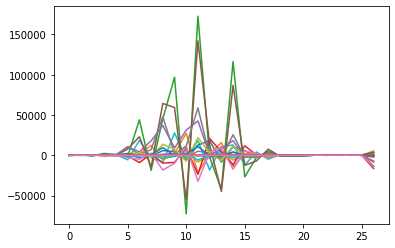

In [5]:
pyplot.plot(psf_coeff)
pyplot.show()

In [6]:
from estimation.psf import PSFEstimationModelFactory

In [8]:
pixels = 9

section_count_of_x = psf_coeff.shape[0]
section_count_of_y = psf_coeff.shape[1]

section_size_of_x = pixels / section_count_of_x
section_size_of_y = pixels / section_count_of_y


In [9]:
half_pixels = int(pixels / 2)


In [10]:

psf_model = PSFEstimationModelFactory.create_spline_model(
        section_size_of_x, section_count_of_x, section_size_of_y, section_count_of_y
)

In [11]:

result_array = np.zeros((pixels, pixels), dtype=int)
for x in range(-half_pixels, half_pixels + 1):
    for y in range(-half_pixels, half_pixels + 1):
        result_array[x + half_pixels, y + half_pixels] = psf_model.model_function(x, y, psf_coeff)

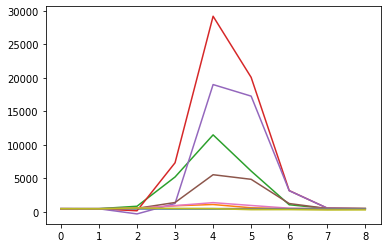

In [12]:
pyplot.plot(result_array)
pyplot.show()

In [13]:
result_array

array([[  432,   452,   453,   449,   450,   454,   449,   457,   440],
       [  429,   448,   456,   423,   436,   457,   453,   452,   427],
       [  433,   537,   815,   138,  -331,   501,   512,   456,   564],
       [  414,   887,  5189,  7314,  1227,  1376,   912,   456,   487],
       [  405,  1074, 11485, 29217, 19004,  5528,  1354,   471,   459],
       [  407,   585,  6078, 20079, 17276,  4842,   932,   468,   301],
       [  426,   450,  1040,  3157,  3141,  1220,   525,   462,   308],
       [  427,   452,   470,   528,   537,   480,   457,   453,   255],
       [  429,   459,   457,   452,   455,   457,   449,   458,   269]])

In [14]:
result_array.sum()

168542

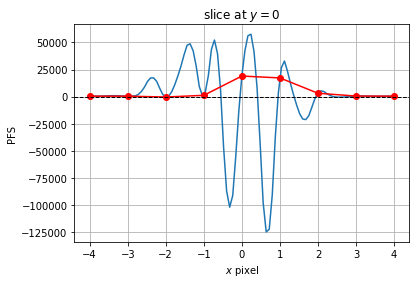

In [16]:
pyplot.plot(np.linspace(-4,4,101),psf_model.model_function(np.linspace(-4,4,101), 0, psf_coeff))
pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), 0, psf_coeff), 'ro')
pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), 0, psf_coeff), c='r', ls='-')
pyplot.axhline(y=0, c='k', lw=1, ls='dashed')
pyplot.grid()
pyplot.xlabel(r'$x$ pixel')
pyplot.ylabel(r'PFS')
pyplot.title(r'slice at $y=0$')
pyplot.show()

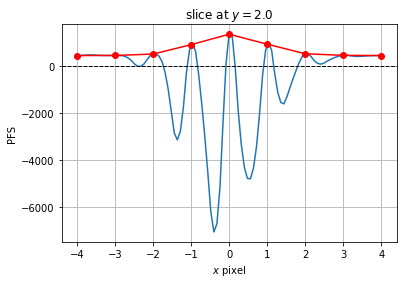

In [17]:
y=2
pyplot.plot(np.linspace(-4,4,101),psf_model.model_function(np.linspace(-4,4,101), y, psf_coeff))
pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), y, psf_coeff), 'ro')
pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), y, psf_coeff), c='r', ls='-')
pyplot.axhline(y=0, c='k', lw=1, ls='dashed')
pyplot.grid()
pyplot.xlabel(r'$x$ pixel')
pyplot.ylabel(r'PFS')
pyplot.title(r'slice at $y=%.1lf$'% (y))
pyplot.show()

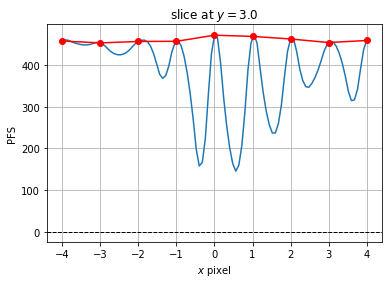

In [18]:
y=3
pyplot.plot(np.linspace(-4,4,101),psf_model.model_function(np.linspace(-4,4,101), y, psf_coeff))
pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), y, psf_coeff), 'ro')
pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), y, psf_coeff), c='r', ls='-')
pyplot.axhline(y=0, c='k', lw=1, ls='dashed')
pyplot.grid()
pyplot.xlabel(r'$x$ pixel')
pyplot.ylabel(r'PFS')
pyplot.title(r'slice at $y=%.1lf$'% (y))
pyplot.show()

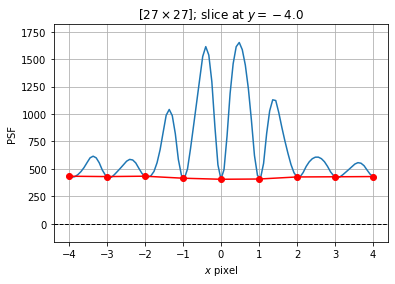

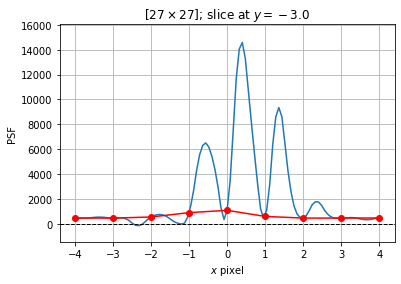

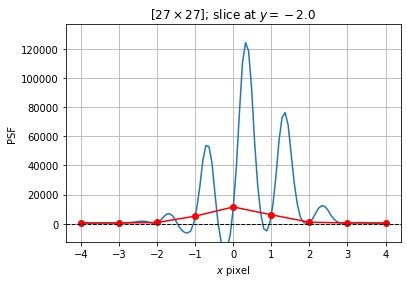

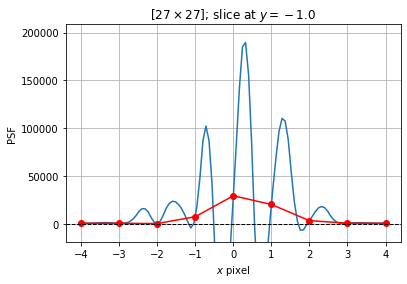

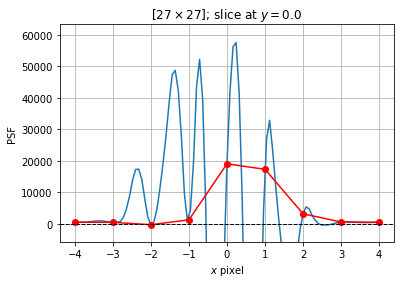

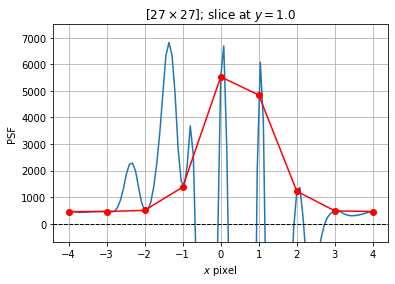

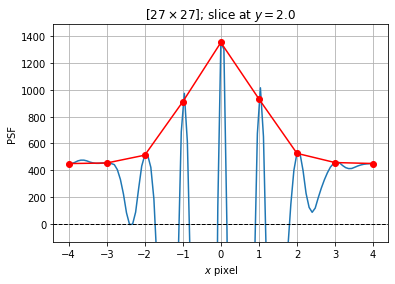

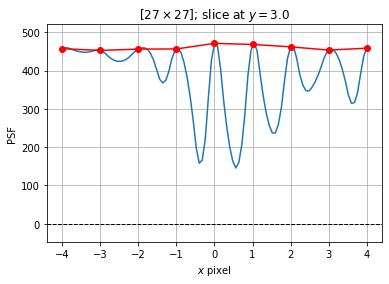

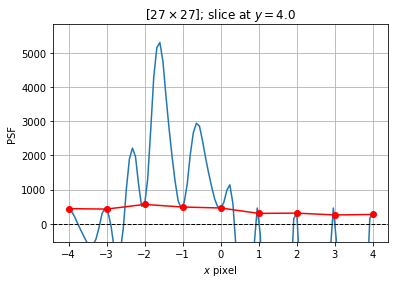

In [23]:

array_y = np.linspace(-4,4,9)

for i, y in enumerate(array_y):
    psf_continuous = psf_model.model_function(np.linspace(-4,4,101), y, psf_coeff)
    max_psf_at_slice_y = np.max( psf_continuous )
    min_psf_at_slice_y = np.min( psf_continuous )
    
    pyplot.plot(np.linspace(-4,4,101),psf_model.model_function(np.linspace(-4,4,101), y, psf_coeff))
    pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), y, psf_coeff), 'ro')
    pyplot.plot(np.linspace(-4,4,9),psf_model.model_function(np.linspace(-4,4,9), y, psf_coeff), c='r', ls='-')
    pyplot.axhline(y=0, c='k', lw=1, ls='dashed')
    pyplot.grid()
    
    pyplot.ylim([-max_psf_at_slice_y*0.1, max_psf_at_slice_y*1.1])
    pyplot.xlabel(r'$x$ pixel')
    pyplot.ylabel(r'PSF')
    pyplot.title(r'[$27\times27$]; slice at $y=%.1lf$'% (y))
    pyplot.savefig('fig/psf_slice_%02d_y%+03d.png' % (i,1000*y))
    pyplot.show()



In [24]:
!convert -delay 100 fig/*png fig/movie100.gif


